<a href="https://colab.research.google.com/github/sujeengim/mini-ai-study/blob/main/Hyperparameter%20Tuning/Hyperparameter_Tuning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 머신러닝 모델링 및 하이퍼파라미터 튜닝 실습1 [회귀]

항공권 가격 예측 데이터셋과 항공사 고객 만족 여부 데이터셋을 갖고 머신러닝 모델을 학습한다.

이후 하이퍼파라미터 튜닝 실습을 통해 성능을 개선한다.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 회귀 : 항공권 가격 예측 모델링하기

## 1. 데이터 불러오기

In [1]:
import pandas as pd
cdf = pd.read_csv('/content/drive/MyDrive/study/aice/실습/자료/Clean_Dataset.csv')

cdf = cdf[:5000]

cdf.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


## 2. 데이터 전처리
- Unnamed ❤️삭제 및 데이터 기초 통계정보 확인

In [2]:
cdf["Unnamed: 0"].value_counts()

cdf.drop("Unnamed: 0", axis=1, inplace=True)

In [3]:
cdf.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000
unique,6,222,1,6,3,6,1,1,NaN,NaN,NaN
top,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,1496,90,5000,1391,3619,1702,5000,5000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.665682,14.216800,7589.786600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.247512,7.109536,4476.362204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2409.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,8.000000,4678.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,14.000000,5955.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.080000,20.000000,10549.000000


- null 데이터 분석 및 처리

In [4]:
print("Null 데이터 확인")
cdf.info()

Null 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


- airline(항공사이름) 칼럼 분석 및 처리하기

In [5]:
# 칼럼이 유의미한 컬럼인지 확인
cdf["airline"].value_counts()


,count
airline,
Vistara,1496
Air_India,1311
Indigo,813
GO_FIRST,801
SpiceJet,296
AirAsia,283


❤️ seaborn의 barplot은 기본 설정(Default)이 각 카테고리별 '평균(Mean)'값을 계산하여 막대로 그려주는 것입니다.

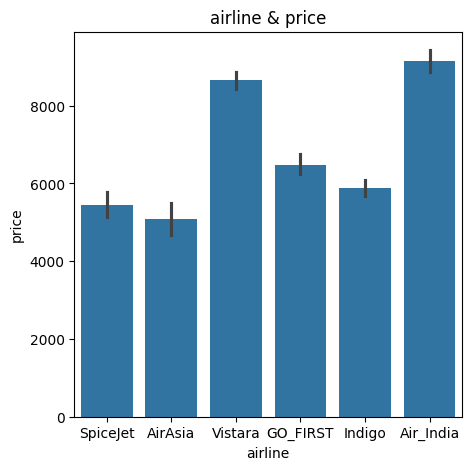

In [6]:
# 항공사가 가격과 연관이 있는지 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))

ax = sns.barplot(x='airline', y='price', data=cdf)

ax.set(title='airline & price')

plt.show()

항공사별로 가격에 차이가 있는것이 확인됨으로, airline 컬럼은 지우지 않고 가져가기로 결정


- flight(항공편명) 칼럼 분석 및 처리

In [7]:
cdf.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [8]:
cdf.flight.value_counts()

,count
flight,
UK-819,90
UK-879,62
UK-899,61
UK-705,61
UK-835,60
...,...
6E-2901,2
I5-881,2
I5-744,1


유의미한 데이터인지 확인-> 항공편명의 의미 해석

- 3자리 코드는 국제선 / 4자리 코드는 국내선
- 출발, 도착 지역마다 코드가 다름

-> '출발지' 등의 다른 컬럼으로 대체 가능함 -> 삭제로 결정

In [9]:
cdf.drop('flight', axis=1, inplace=True)
cdf.shape

(5000, 10)

- ❤️원핫인코딩
모델 적용을 위해 범주형 데이터를 수치화 하기

-> 실제로 숫자인데 문자형으로 된 변수는 없음

-> 문자형 변수에 대해 원핫인코딩 진행

In [11]:
dummies_cdf = pd.get_dummies(
    cdf,
    columns=['airline','source_city','departure_time','stops','arrival_time',
             'destination_city','class'],
    drop_first=True
)

print(f'''원핫 인코딩 전 {cdf.shape}
원핫 인코딩 후 {dummies_cdf.shape}''')

원핫 인코딩 전 (5000, 10)
원핫 인코딩 후 (5000, 20)


- 학습 데이터 만들기
x, y로 분리하기

In [12]:
y = dummies_cdf.price
x = dummies_cdf.drop('price', axis=1)

print(x.shape, y.shape)

(5000, 19) (5000,)


## 3. 모델 학습하기
앙상블 계열 모델 성능 비교하기

In [13]:
!pip install xgboost
!pip install lightgbm

사이킷런의 5개 모델과 외부 모델 2개

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split

In [18]:
# ❤️
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=2023
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3500, 19), (3500,), (1500, 19), (1500,))

- 모델 생성하기

n_jobs(사용할 cpu 개수) 옵션이 있는 모델은 -1(모두 사용)을 적용하여 동작시키기

In [19]:
lr = LinearRegression(n_jobs=-1)
dtr = DecisionTreeRegressor(random_state=1)
rfr = RandomForestRegressor(random_state=1)
gbr = GradientBoostingRegressor(random_state=1)
etr = ExtraTreesRegressor(random_state=1, n_jobs=-1)
xgbr = XGBRegressor(random_state=1, n_jobs=-1)
lgbmr = LGBMRegressor(random_state=1)

- 모델 학습하기

In [21]:
%%time

lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
etr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
lgbmr.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 231
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 18
[LightGBM] [Info] Start training from score 7548.349714
CPU times: user 3.28 s, sys: 33.7 ms, total: 3.31 s
Wall time: 3.43 s


LGBMRegressor(random_state=1)